In [14]:
import numpy as np
import matplotlib.pyplot as plt

from ocvx import Newton, Function, constant, backtracking, Probleme

# Génération de problème d'optimisation

In [10]:
f_d = {
    "dim": 1,
    "value": lambda x: x[0]**2 + 3 * x[0] + 12,
    "grad": lambda x: np.array([2*x[0] + 3]),
    "hessian": lambda x: np.diag([2])
}

In [3]:
f_2_d = {
    "dim": 2,
    "value": lambda x: x[0]**2 + 20 * x[1]**2,
    "grad": lambda x: np.array([2*x[0], 40*x[1]]),
    "hessian": lambda x: np.diag([2, 40])
}

In [11]:
f = Function(**f_d)
#f2 = Function(**f_2_d)

# Méthode de Newton

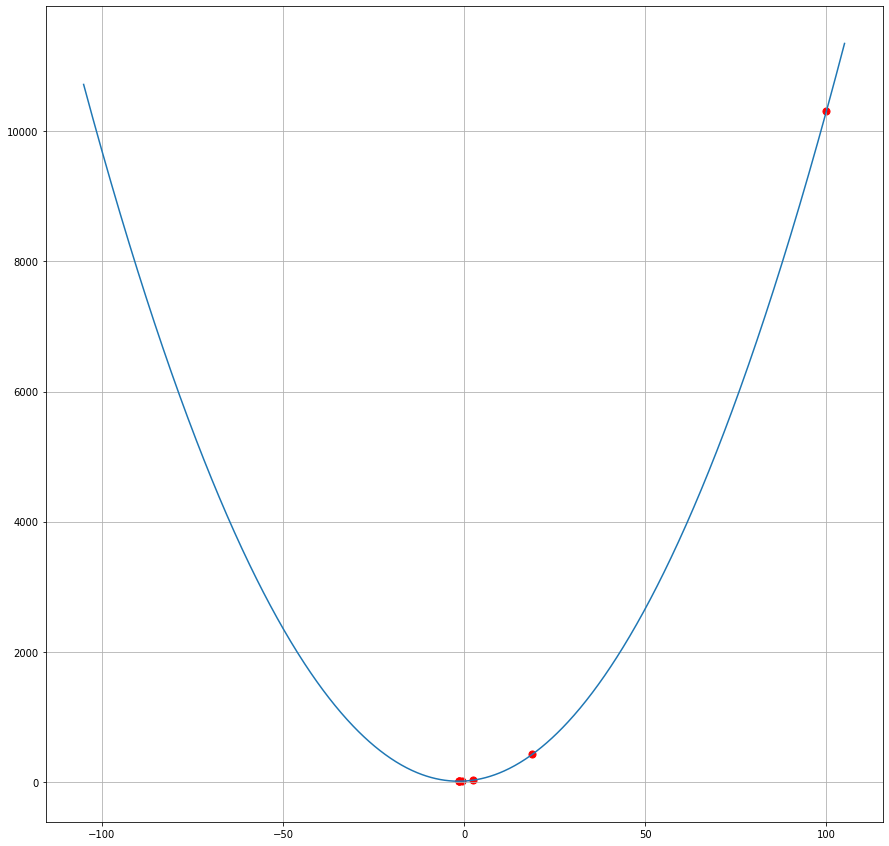

In [12]:
meth = Newton(f, backtracking)
meth(np.array([100, 100]))
meth.plot()

# Newton avec contrainte d'égalité

In [28]:
A = np.array([[1, 3]])
b = np.array([1])
f_d = {
    "value": lambda x: x[0]**2 + x[1]**2,
    "dim": 2,
    "grad": lambda x: np.array([2 * x[0], 2 * x[1]]),
    "hessian": lambda x: np.diag([2, 2])
}
P = Probleme(Function(**f_d), A, b)

In [52]:
class EQNewton:
    def __init__(self, P, pas, epsilon=0.01):
        self.epsilon = epsilon
        self.P = P
        self.pas = pas
        self.save = np.array([])
        
    def _newtonStep(self, x):
        KKT = np.vstack([np.hstack([self.P.f.hessian(x), self.P.A.T]), np.hstack([self.P.A, np.zeros((self.P.A.T.shape[1], self.P.A.T.shape[1])).astype(P.A.dtype)])])
        g = P.f.grad(x)
        res = np.hstack([-1 * g, np.zeros((KKT.shape[0] - g.shape[0]))])
        x_out = np.linalg.solve(KKT, res)
        return x_out[:P.f.dim]
        
    def __call__(self, x0):
        self.save = []
        
        x = x0
        self.save.append(x)
        dxN = self._newtonStep(x)
        lmd = -1 * np.dot(self.P.f.grad(x), dxN)
        while lmd / 2 > self.epsilon:
            dxN = self._newtonStep(x)
            lmd = -1 * np.dot(self.P.f.grad(x), dxN)
            (t, _) = self.pas(self.P.f, x)
            x = x + t * dxN
            self.save.append(x)
        
        self.save = np.array(self.save)
        return x

In [57]:
meth = EQNewton(P, backtracking)
meth(np.array([-14, 5]))

array([0.095488, 0.301504])

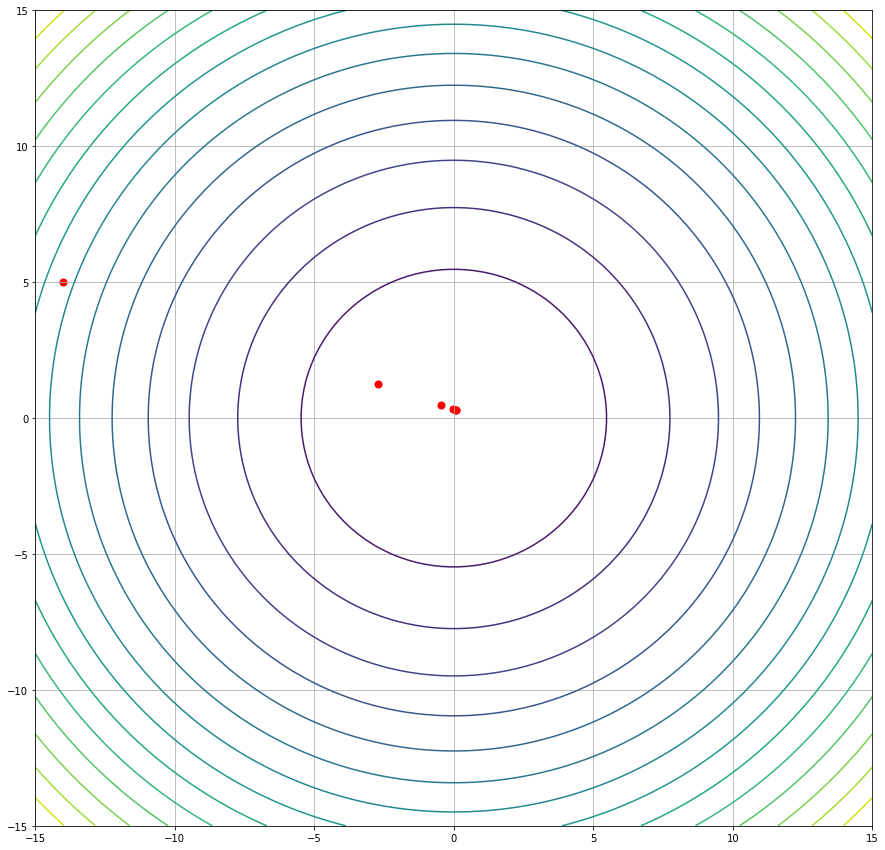

In [59]:
plt.figure(figsize=(15, 15))
x, y = np.linspace(-15, 15, 100), np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)
x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(2, -1)
z = P.f.value(x_y)
plt.contour(X, Y, z.reshape(100, -1), 15)
plt.scatter(meth.save[:, 0], meth.save[:, 1], 50, c="red")
plt.grid()
plt.show()